In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [209]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [210]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [211]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [212]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [220]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [213]:
dependent=dataset[["charges"]]

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [119]:
#StandardScaler method to be used for SVM
"""from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)"""

'from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx_train=sc.fit_transform(x_train)\nx_test=sc.transform(x_test)'

In [215]:
#model creation
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0,criterion='squared_error')
regressor=regressor.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


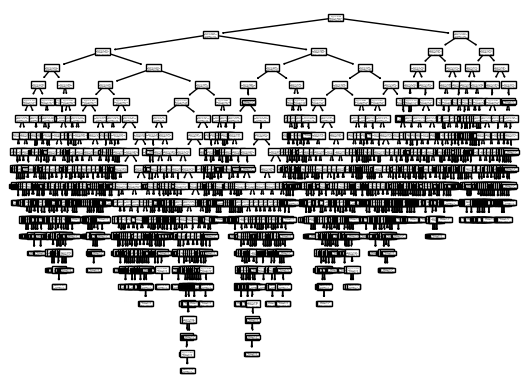

In [171]:
"""import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()"""

In [216]:
y_pred=regressor.predict(x_test)

In [217]:
#to test a model
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [218]:
r_score

0.8538307913484513

In [219]:
#To save a model
import pickle
filename="finalized_model_RF.sav"
pickle.dump(regressor,open(filename,'wb'))